# FUNDAMENTAL 18. 딥러닝 들여다보기  🪐
> 학습목표: 딥러닝 프레임워크를 사용하지 않고, Numpy만을 이용해 딥러닝 모델과 훈련 과정을 직접 구현해 본다.

## 인공 신경망(Neural Network)이란❓
우리 뇌 속의 신경망 구조에 착안해서 **퍼셉트론(Perceptron)**이라는 형태를 제안하며 이를 연결한 형태


## 🔮 MNIST 이미지 분류기 모델
- 숫자 이미지 데이터셋

In [1]:
# import lib
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### ✨ reshape() 함수
https://yganalyst.github.io/data_handling/memo_5/

In [10]:
x = np.arange(12)
x.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
print(x.reshape(-1))  # 1차원 배열 반환
print(x.reshape(-1, 1))  # 2차원 배열 반환
x.reshape(-1, 2)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

### ❓❓❓모델에 맞는 사이즈 어떻게 알 수 있는지 -> 스케일링

In [11]:
# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0  # scaling -> 0~1 데이터 크기
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

In [12]:
x_train_norm.shape, x_test_norm.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
x_train_reshaped.shape, x_test_reshaped.shape

((60000, 784), (10000, 784))

In [14]:
# 딥러닝 모델 구성 - 2 Layer Perceptron
model = keras.models.Sequential()  # 다른 방법도 있지만, 순서대로 써주면 됨(편리해서)
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


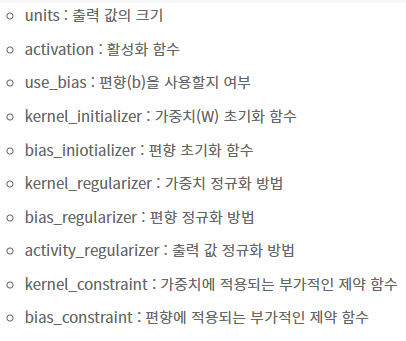

In [15]:
# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.5024 - accuracy: 0.8792
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2324 - accuracy: 0.9343
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1810 - accuracy: 0.9484
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1495 - accuracy: 0.9576
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1277 - accuracy: 0.9637
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1121 - accuracy: 0.9684
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0992 - accuracy: 0.9716
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0894 - accuracy: 0.9744
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0805 - accuracy: 0.9766
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.073

https://www.tensorflow.org/api_docs/python/tf/keras/Model
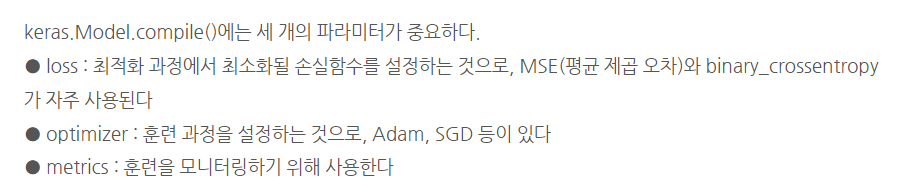
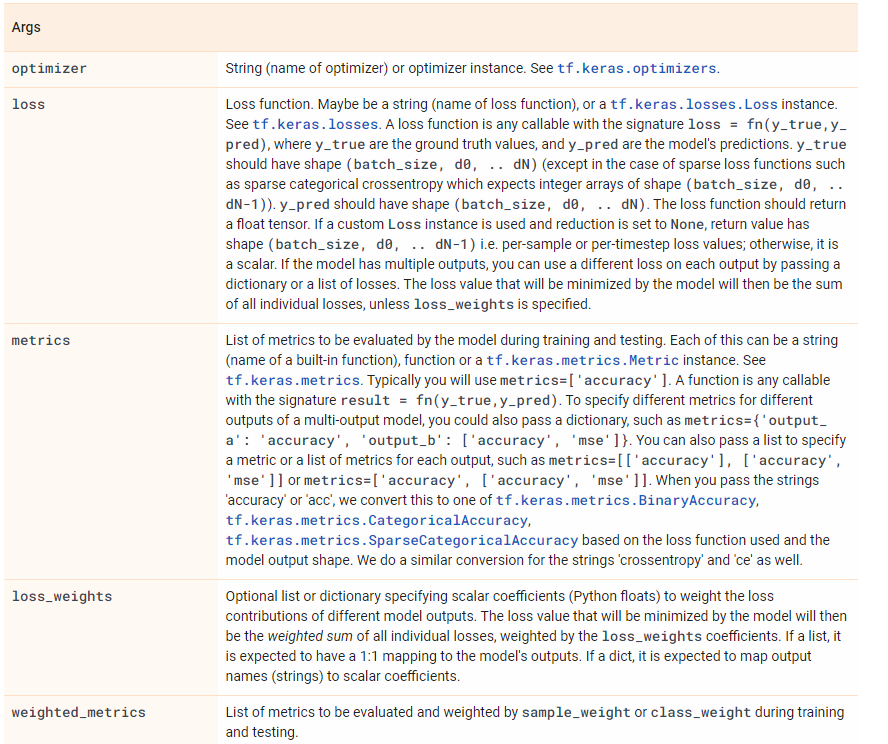

In [16]:
# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 0s - loss: 0.1041 - accuracy: 0.9699
test_loss: 0.10405939072370529 
test_accuracy: 0.9699000120162964


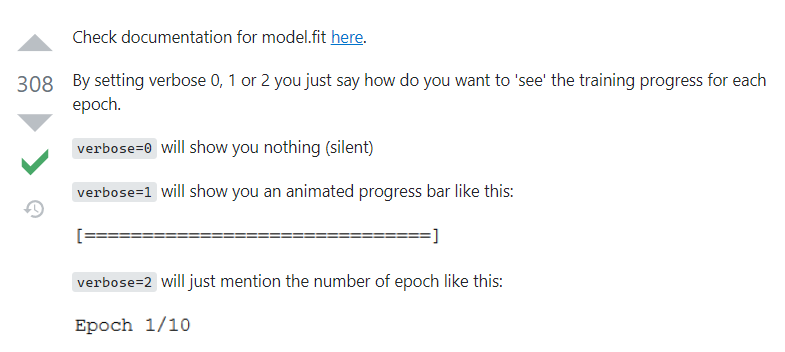
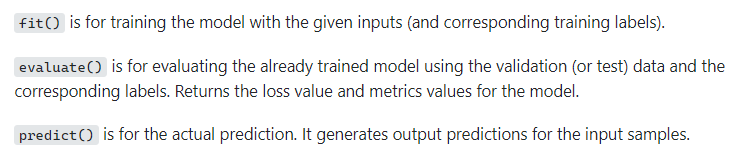
https://www.tensorflow.org/api_docs/python/tf/keras/Model

## 🔮다층 퍼셉트론(Multi-Layer Perceptron; MLP)
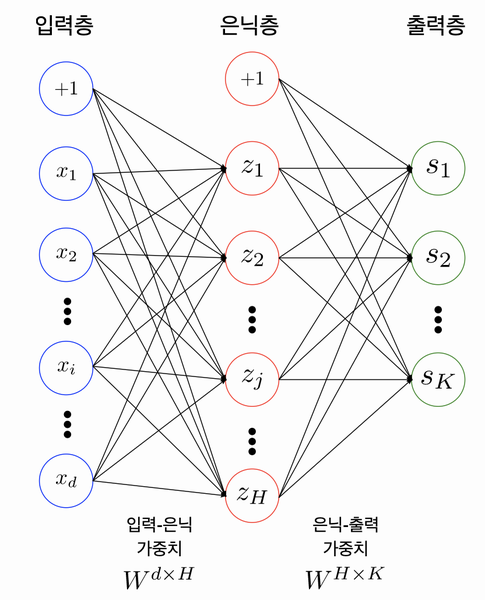
#### input layer, output layer, hidden layer(입력층과 출력층 사이에 있는 모든 층)
- 은닉층: 노드 수가 아니라 노드와 노드 사이 연결하는 부분 = 2 layer

### DNN(Deep Neural Network) 
충분히 깊은 인공신경망, 은닉층이 많아질수록 Deep해진다.

### Fully-Connected Neural Network
서로 다른 층에 위치한 노드 간에는 연결 관계가 존재하지 않으며, 인접한 층에 위치한 노드들 간의 연결만 존재한다는 의미를 내포한다.
- MLP의 다른 용어  

## 🪐 bias 왜 필요한지에 대한 설명 
https://stackoverflow.com/questions/2480650/what-is-the-role-of-the-bias-in-neural-networks


##  🔮 MLP 기반 딥러닝 모델을 Numpy로 만들기

In [17]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


### Parameters/Weights
*Parameter에는 `bias`노드도 포함*
- 입력값: 100개, 은닉 노드: 20개 --> 입력층-은닉층: 100 x 20 행렬   
- 은닉 노드: 20개, 출력층: 10개 --> 은닉층-출력층: 20 x 10 행렬  

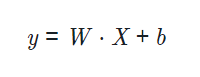

### ❓❓❓`weight_init_std` 왜 처음에 0.1인지 ❓❓ 
### `bias`의 shape ❓❓ 해결 ~
hidden layer 개수만큼 하나씩 더 있다는게 저렇게 표현되는건가

In [18]:
weight_init_std = 0.1  # 표준편차, 적당한 숫자, Dense layer 초기값 Xavier 0~1로 맞춰주기 위함?
input_size = 784
hidden_size = 50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  # 표준정규분포(0,1)를 따르는 값, 표준편차=1 좀 높여줌..골고루

# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)
W1, b1, a1

(784, 50)
(50,)
(5, 50)


(array([[ 0.15511939,  0.0192341 , -0.14065185, ..., -0.02256295,
          0.11082909,  0.13495951],
        [ 0.00571681, -0.14709428, -0.13186894, ..., -0.00702023,
         -0.05811252,  0.10939162],
        [ 0.20768485,  0.28484874, -0.03684593, ...,  0.02786551,
         -0.25230963, -0.03874338],
        ...,
        [-0.1331832 , -0.09543737, -0.01319316, ...,  0.0793486 ,
          0.03945002,  0.06740256],
        [-0.01930643,  0.11250525,  0.04630111, ...,  0.02291236,
          0.0704527 ,  0.10042411],
        [ 0.08076216,  0.17456881,  0.10766559, ...,  0.10658715,
         -0.04210391,  0.11483752]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[-0.15909829, -0.40374779, -0.23081506, -1.21810575,  0.19366324,
          0.49100084, -0.70853788, -0.29126854,  1.20166971,  0.02928311,

### 활성화 함수 (Activation Functions)
- 보통 비선형 함수 : MLP 안에 포함시키면 모델의 표현력이 좋아짐
- 레이어 사이에 이 비선형 함수가 포함되지 않은 MLP는 한 개의 레이어로 이루어진 모델과 수학적으로 다른 점이 없다
https://stackoverflow.com/questions/9782071/why-must-a-nonlinear-activation-function-be-used-in-a-backpropagation-neural-net/54503251#54503251

### ✨ Vanishing Gradient Problem
https://brunch.co.kr/@chris-song/39

##  🔮 MLP 레이어 함수로 구현
> 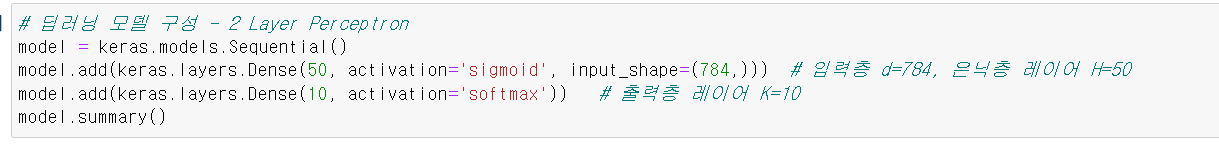
### 1. 첫 번째 은닉층의 출력 a1에다가 sigmoid를 적용한다.

In [19]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.46030911 0.40041223 0.44255106 0.22826997 0.54826505 0.62034218
 0.329922   0.42769334 0.76882168 0.50732025 0.66198959 0.57241415
 0.41741913 0.79449027 0.29396412 0.52183111 0.56081191 0.3781796
 0.10470666 0.38809824 0.3460297  0.44650257 0.27590782 0.82425542
 0.36478827 0.82237188 0.70399153 0.42635505 0.333295   0.30893438
 0.39331959 0.624077   0.78073525 0.31538296 0.67490089 0.39701437
 0.79390074 0.12464236 0.33492935 0.80986324 0.45998224 0.17171219
 0.61144925 0.75262292 0.40011893 0.62446943 0.47124224 0.5475367
 0.74979508 0.59352447]


### 2. sigmoid 다음에 다시 Dense 레이어가 출현

In [20]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)  # 중간값 저장 -> 나중에 backpropagation할 때 쓰려고 저장
    return y, cache

### ❓❓cache가 뭔가요❓왜필요❓

In [25]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

W1.shape, b1.shape, W2.shape, b2.shape

((784, 50), (50,), (50, 10), (10,))

### ❓❓a1❓❓❓ 해결~
a1에는 y = Wx + b 계산한 값이 들어감

In [51]:
a1, cache1 = affine_layer_forward(X, W1, b1)
a1.shape

(5, 50)

In [35]:
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

In [37]:
print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다. 총 10개.

[ 0.12957414  0.46184385  0.19024832  0.27631695  0.71352109  0.40362443
 -0.20417687  0.84639688 -0.20558258  0.54762212]


## 🔮오차를 구하는 방법 
### ✨ Softmax 활성화 함수
[딥러닝 - 소프트맥스 함수](https://leedakyeong.tistory.com/entry/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0-%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4-%ED%95%A8%EC%88%98-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0-in-%ED%8C%8C%EC%9D%B4%EC%8D%AC-softmax-in-python)
- 신경망의 출력층에서 사용한다
- 분류 문제에서 소프트 맥스는 각각의 결과 값을 확률로 바꿔주기 위해 사용한다.
- MLE(최대 우도 추정)로 y가 어느 범주일지 확률을 추정하게 된다.
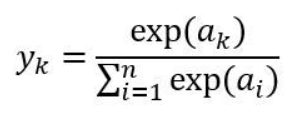

### ❓오버플로우란
컴퓨터가 표현할 수 있는 수의 범위가 너무 한정되어, 너무 큰 값은 표현할 수 없는 문제
- 최댓값을 빼는 방식 
> ❓❓❓식변형❓이해안감 
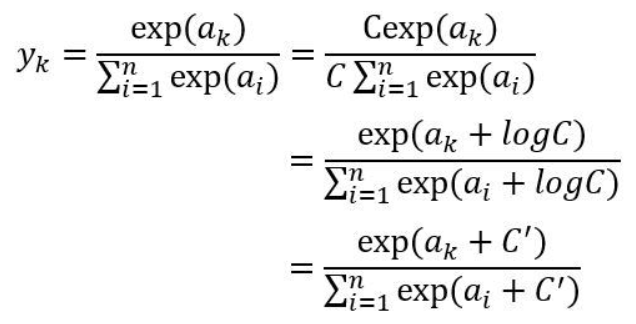

### 3. 모델의 최종 출력인 a2에 softmax 함수 적용. 
- 모델의 출력은 입력 X가 10가지 숫자 중 하나일 확률의 형태로 가공됩니다

In [45]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

### ❓❓왜 transpose 해주는거지 ❓❓❓
- 행렬의 크기 맞추기 위함
- softmax 해주기 전에 flatten 해줘야 하는데, 그거 대신에 수동으로 맞춰줌...

[numpy.ndarray.T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html)

> ### 🌷ndim vs. shape
[링크](https://datascienceschool.net/01%20python/03.01%20%EB%84%98%ED%8C%8C%EC%9D%B4%20%EB%B0%B0%EC%97%B4.html#:~:text=%EB%B0%B0%EC%97%B4%EC%9D%98%20%EC%B0%A8%EC%9B%90%EA%B3%BC%20%ED%81%AC%EA%B8%B0%20%EC%95%8C%EC%95%84%EB%82%B4%EA%B8%B0,-ndim&text=%EB%B0%B0%EC%97%B4%EC%9D%98%20%EC%B0%A8%EC%9B%90%20%EB%B0%8F%20%ED%81%AC%EA%B8%B0,%EC%9D%98%20%ED%81%AC%EA%B8%B0%EB%A5%BC%20%EB%B0%98%ED%99%98%ED%95%9C%EB%8B%A4.)
>- `ndim`: 배열의 차원  
> - `shape`: 배열의 크기 

In [48]:
print(a1.ndim)
a1.shape, a1.T.shape

2


((5, 50), (50, 5))

In [111]:
a1.shape

(5, 50)

In [62]:
# print(a2)
# print(a2.shape)
# print(a2.ndim)
# print(a2[0], a2[1], a2[2], a2[4])
# a2.shape, a2.T.shape

[[ 1.29574136e-01  4.61843851e-01  1.90248322e-01  2.76316949e-01
   7.13521093e-01  4.03624432e-01 -2.04176868e-01  8.46396882e-01
  -2.05582582e-01  5.47622124e-01]
 [ 3.01311986e-01  2.99331014e-01  2.29264605e-01  1.72033731e-01
   7.32210222e-01  5.24563176e-01 -3.61977114e-01  1.10821319e+00
  -2.92505362e-01  7.20162432e-01]
 [ 1.56507899e-01  3.61404775e-01  1.20932718e-01  2.69148660e-01
   6.44112322e-01  4.64961293e-01 -2.77237808e-01  8.89477436e-01
  -3.50659264e-01  6.84379956e-01]
 [ 1.61490362e-02  1.63984619e-01 -4.32326949e-02  2.76741855e-01
   5.81380229e-01  2.60532555e-01 -2.55102677e-01  9.02932339e-01
  -4.38093510e-01  4.87829075e-01]
 [-1.79403234e-02  5.62863813e-01 -1.01660001e-03  1.48282797e-01
   3.50914275e-01  2.84938323e-01 -2.11604412e-01  9.06029350e-01
  -4.65101973e-01  5.28525324e-01]]
(5, 10)
2
[ 0.12957414  0.46184385  0.19024832  0.27631695  0.71352109  0.40362443
 -0.20417687  0.84639688 -0.20558258  0.54762212] [ 0.30131199  0.29933101  0.229

((5, 10), (10, 5))

In [40]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.07860716, 0.1095885 , 0.08352424, 0.0910315 , 0.14095063,
       0.1033905 , 0.05630097, 0.16098086, 0.05622188, 0.11940376])

## 🔮 손실함수(Loss function)
비선형 활성화 함수를 가진 여러 개의 은닉층을 거친 다음 신호 정보들은 출력층으로 전달할 때, 우리가 원하는 정답과 전달된 신호 정보들 사이의 차이를 계산하고, 이 **차이**를 줄이기 위해 각 파라미터들을 조정하는 것이 딥러닝의 전체적인 학습 흐름입니다. 
- 차이를 구할 때 사용 


### 평균제곱오차 (MSE: Mean Square Error)
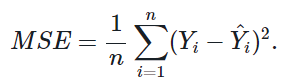

### Cross entropy
- 두 확률분포 사이의 유사도가 클수록 작아지는 값입니다. 
> ✨ 분류 문제에 있어서는 예측한 분류가 정답을 맞췄는지 아닌지가 더 중요한 문제다. 즉, 정답이 '고양이'인 데이터에 대해서 '개'라고 예측한 경우에는, 단순히 확률값과 정답의 차이만큼이 아닌 더 큰 패널티를 줘야한다. 이때 크로스 엔트로피(cross entropy)를 사용한다. 엔트로피란 '불확실성의 정도'라고 알려져 있는데, 여기서는 '정보량'의 개념으로 이해하면 된다. 크로스엔트로피는 '정답'과 예측한 '확률값' 사이에서 얼마나 차이가 발생하는지(얼마나 정보가 발생되는지)를 계산한다. 계산식을 살펴보면 다음과 같다.
- 별로 학습되지 않은 현재의 모델이 출력하는 softmax 값 $\hat{y}$ 은 10개의 숫자 각각의 확률이 대부분 0.1 근처를 오가는 정도

### 4. $\hat{y}$과 정답 비교
> ### ❓❓식 이해안감❓❓❓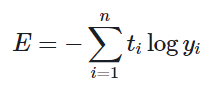

In [81]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

In [82]:
Y_digit = y_train[:5]
Y_digit

array([5, 0, 4, 1, 9], dtype=uint8)

In [83]:
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [84]:
print(y_hat[0])  # 우리 모델의 최종 출력인 softmax(a2)
print(t[0])  # 정답 라벨의 One-hot 인코딩의 분포

[0.07860716 0.1095885  0.08352424 0.0910315  0.14095063 0.1033905
 0.05630097 0.16098086 0.05622188 0.11940376]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### ❓❓reshape 왜함❓정답 레이블의 인덱스로 반환하는 부분 어디❓❓
- `y`: 우리 모델의 최종 출력인 softmax(a2)  
- `t`: 정답 라벨의 One-hot 인코딩의 분포

In [85]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

t

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [86]:
Loss = cross_entropy_error(y_hat, t)
Loss

2.2383399253361858

## 🔮 경사하강법(Gradient Descent)
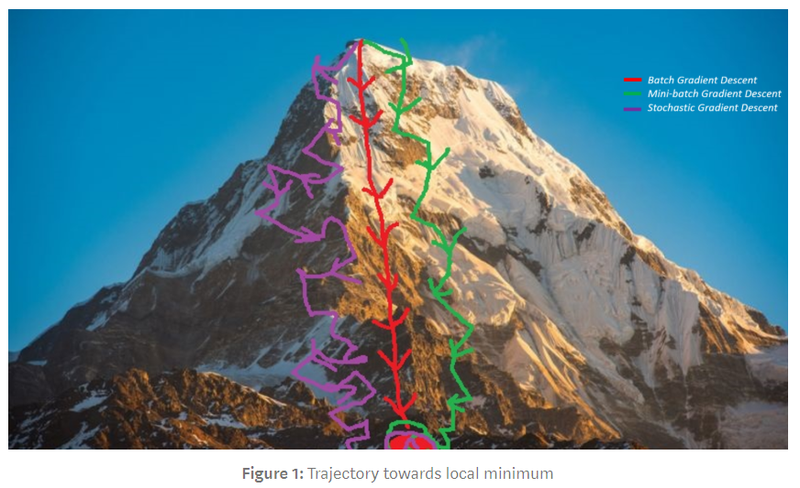
각 시점에서의 기울기가 가리키는 방향으로 이동해나가는 것.

### ✨학습률(learning rate)
학습률을 곱한 만큼만 발걸음을 내딛는 것. 
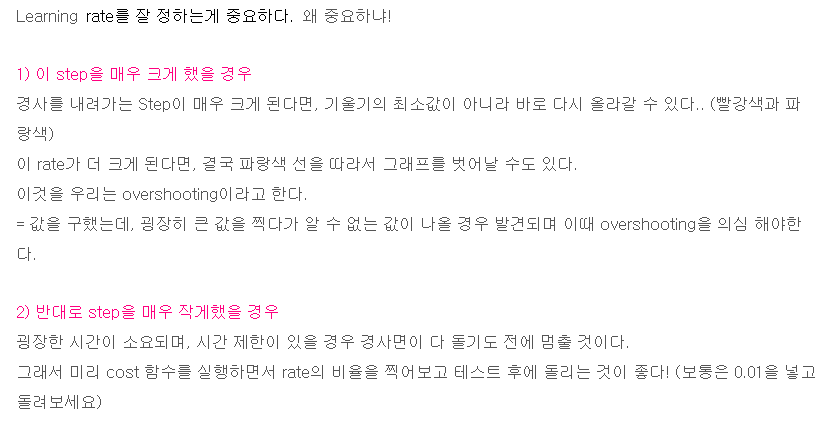
https://aileen93.tistory.com/71


### ✨ 가중치 초기화 (Weight Initialization)

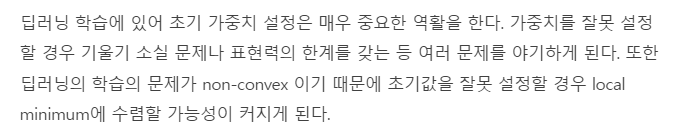

1. LeCun Initialization
- LeCun은 LeNet의 창시자

2. Xavier Initialization
- Xaiver함수는 비선형함수(ex. sigmoid, tanh)에서 효과적인 결과를 보여준다. 하지만 ReLU함수에서 사용 시 출력 값이 0으로 수렴하게 되는 현상

3.He Initialization
- ReLU를 활성화 함수에 사용 가능

https://reniew.github.io/13/

### 1.  파라미터 W의 변화에 따른 오차(Loss) L의 변화량 구하기
- 오차 기울기가 커지는 방향의 반대 방향으로 파라미터를 조정
- 단, 조정을 너무 많이 해주면 안 되기 때문에 적절한 step size 역할을 하는 learning rate가 필수적

### ✨ X-Y 좌표축의 기울기
X의 변화에 따른 Y의 변화량을 의미합니다. Y를 X로 미분해서 구할 수 있습니다.
- `dy`: 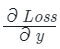
- `dx`: 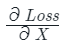

### ❓❓'softmax값의 출력으로 Loss를 미분한 값' 식이 이렇게 나옴 ❓❓❓❓❓
기울기 구하는 공식인건 알겠는데, 왜 x의 변화량 = batch num 인가요? 

In [94]:
batch_num = y_hat.shape[0]  # 행의 개수를 가져와서 batch_num으로 사용한건가 ? 
print(batch_num)
print(y_hat.shape)
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

5
(5, 10)


array([[ 0.01572143,  0.0219177 ,  0.01670485,  0.0182063 ,  0.02819013,
        -0.1793219 ,  0.01126019,  0.03219617,  0.01124438,  0.02388075],
       [-0.18249383,  0.01747152,  0.01628926,  0.01538318,  0.02693567,
         0.02188506,  0.00901837,  0.03923049,  0.00966717,  0.0266131 ],
       [ 0.01622289,  0.01991196,  0.01565591,  0.01815715, -0.17358247,
         0.02208452,  0.01051369,  0.03376393,  0.00976941,  0.02750301],
       [ 0.01554798, -0.18197488,  0.0146516 ,  0.02017661,  0.02736219,
         0.01985219,  0.01185416,  0.03773976,  0.00987186,  0.02491851],
       [ 0.01482031,  0.02649094,  0.01507326,  0.01750037,  0.02143132,
         0.020063  ,  0.01221097,  0.03733639,  0.00947671, -0.17440328]])

### ✨Chain Rule 
- y가 구해지면 다른 기울기들은 chain-rule로 쉽게 구해집니다.
- 학습해야 할 모든 파라미터 W1, b1, W2, b2에 대한 기울기를 모두 얻을 수 있습니다.
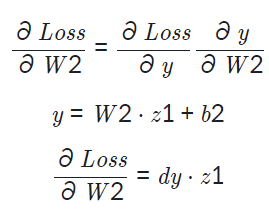

### ❓❓❓❓여기 밑에 코드들 같이 보고 싶음❓❓

In [95]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.10853421, -0.02322066,  0.0357407 ,  0.03955792, -0.02656483,
        -0.02975251,  0.02410237,  0.08250513,  0.02253779, -0.01637172],
       [-0.12954265, -0.04451966,  0.06257731,  0.07014575, -0.01636832,
        -0.10292301,  0.04323989,  0.14330696,  0.03985479, -0.06577106],
       [-0.10112161, -0.10230536,  0.06065539,  0.06949054, -0.01152666,
        -0.07688812,  0.04270782,  0.14059506,  0.03881295, -0.06042001],
       [-0.06664257, -0.07173926,  0.04304178,  0.0493084 , -0.02022446,
        -0.06636231,  0.0301451 ,  0.0989341 ,  0.02759133, -0.02405211],
       [-0.07472459, -0.05428161,  0.03856192,  0.04413024, -0.05156633,
         0.00483383,  0.02705365,  0.09058205,  0.02439642, -0.04898559],
       [-0.07035705, -0.05853751,  0.03578967,  0.04049046, -0.02881711,
        -0.08715038,  0.02424928,  0.08036545,  0.0230011 ,  0.04096609],
       [-0.08329907, -0.01929206,  0.03501794,  0.03887276,  0.00537399,
        -0.07410139,  0.02394485,  0.07970508

In [97]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

#### sigmoid 활성화함수에 대한 gradient도 고려해야 함.

In [98]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [99]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

#### 파라미터를 업데이트하는 함수 생각해보면, learning_rate도 고려해야함

In [100]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

## 오차역전파법(Backpropagation)이란❓
- MLP를 학습시키기 위한 일반적인 알고리즘 중 하나
> 출력층의 결과와 내가 뽑고자 하는 target 값과의 차이를 구한 뒤, 
그 오차 값을 각 레이어들을 지나며 역전파 해가며 각 노드가 가지고 있는 변수들을 갱신해 나가는 방식
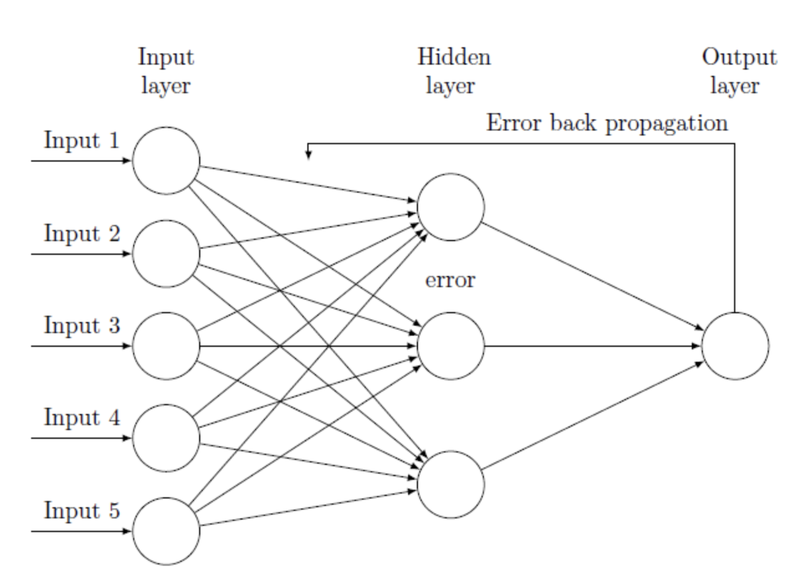

### 이전의 affine_layer_forward(X, W, b)에 대응하여 생각해 보면 해당 레이어의 backpropagation 함수 구하기
### ❓❓Transpose하는 이유❓❓ 뒤에서부터니까 ...

In [102]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

###  Forward Propagation과 Backward Propagation 

In [103]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.13355827 0.08937073 0.07903762 0.17384696 0.06815047 0.08435169
  0.087697   0.07993332 0.08129333 0.12276062]
 [0.11882467 0.10742063 0.08243648 0.15224994 0.05535796 0.09389445
  0.08158218 0.08800139 0.08903144 0.13120088]
 [0.14555393 0.09024114 0.08981381 0.15811941 0.04411773 0.10569583
  0.07035596 0.0764035  0.09177503 0.12792365]
 [0.13869399 0.08722412 0.09352525 0.16564375 0.04750776 0.09331116
  0.07983102 0.07081231 0.09358487 0.12986578]
 [0.13110399 0.10001777 0.08150702 0.15036312 0.04669475 0.09476586
  0.08592356 0.07321139 0.09973281 0.13667973]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.4306298702441325


## ❓❓ 18-(6) 코드 쭉 같이 보기...❓❓❓
어떻습니까? 모델이 추론한 확률값 y_hat이 정답의 One-hot 인코딩 t값에 조금씩 근접하는 것과, Loss가 점점 감소하는 것이 확인되십니까?

In [104]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:  # detailed logging information
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [105]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.13541599 0.04925694 0.04395207 0.12844265 0.11792209 0.1110696
  0.1747739  0.06750919 0.06892686 0.10273073]
 [0.09847429 0.05614422 0.05877643 0.1263105  0.10046291 0.12902455
  0.18319179 0.07527702 0.07021155 0.10212673]
 [0.09714764 0.07897821 0.0566165  0.09565279 0.08840883 0.14388991
  0.18590355 0.07657741 0.08786527 0.08895988]
 [0.10024466 0.06704977 0.05886021 0.11685711 0.09611953 0.12445802
  0.17540062 0.06358089 0.09094407 0.10648512]
 [0.10994892 0.06889738 0.0554753  0.11288977 0.08807801 0.14169105
  0.15797521 0.09134732 0.07446772 0.09922932]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.390796692753072
---------
[[0.15711577 0.05934298 0.04034975 0.10685325 0.13192996 0.13199043
  0.13473331 0.05997564 0.06055162 0.1171573 ]
 [0.11970001 0.06667368 0.05445371 0.10727431 0.11217307 0.14798179
  0.14350553 0.06796061 0.06226

### ✨5번 학습한 파라미터 W1, b1, W2, b2를 가지고 숫자를 인식(Predict) 및 정확도(Accuracy) 측정

In [107]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [108]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.20348106, 0.09171675, 0.02615062, 0.05575017, 0.15645586,
       0.18771094, 0.06251009, 0.03589451, 0.03558744, 0.14474255])

### 추론한 결과의 정확도 계산

In [109]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [110]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.20348106 0.09171675 0.02615062 0.05575017 0.15645586 0.18771094
 0.06251009 0.03589451 0.03558744 0.14474255]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.1


## 🔮 18-(8)  Accuracy, Loss 변화 시각화

### ✨ RcParams
matplotlib.pylab의 rcParams을 이용하여 차트 그림(figure)의 기본 설정을 지정할 수 있습니다  
https://mirandaherr.tistory.com/18

#### markers
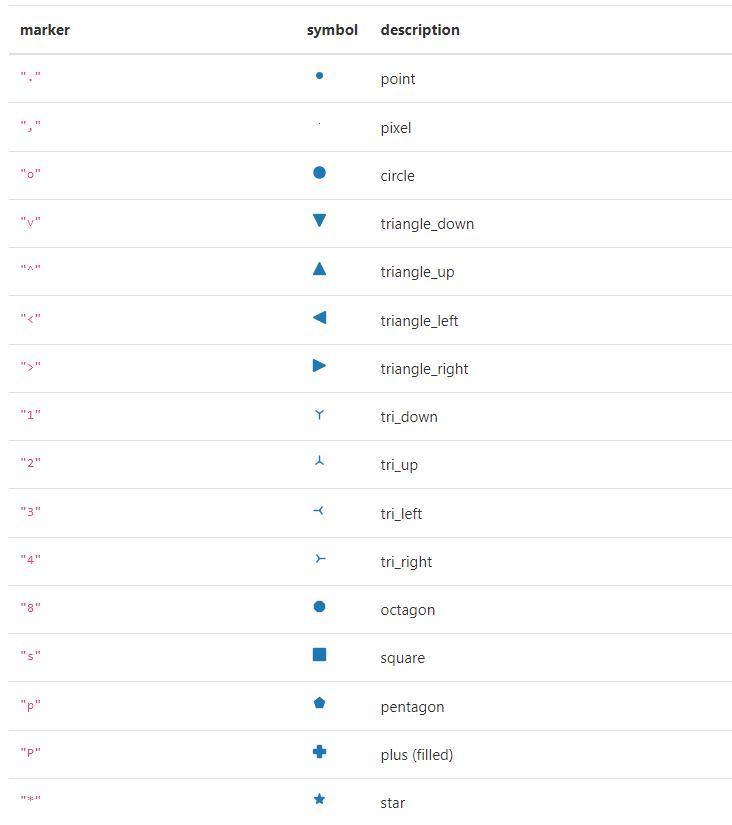
https://matplotlib.org/stable/api/markers_api.html